# 2장. 딥러닝 핵심 미리보기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch02-colab.ipynb)

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비 

In [5]:
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [35]:
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",") # 준비된 수술 환자 데이터를 불러옵니다.
X = Data_set[:,0:16]                                                 # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]                                                   # 수술 후 사망/생존 여부를 y로 지정합니다.
print(X,"""                 
""", y)

[[ 1.    2.88  2.16 ...  1.    0.   60.  ]
 [ 2.    3.4   1.88 ...  1.    0.   51.  ]
 [ 2.    2.76  2.08 ...  1.    0.   59.  ]
 ...
 [ 2.    3.04  2.08 ...  0.    0.   52.  ]
 [ 2.    1.96  1.68 ...  1.    0.   79.  ]
 [ 2.    4.72  3.56 ...  1.    0.   51.  ]]                  
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.

### 3. 구조 결정 

In [12]:
model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model

### 4. 모델 실행 

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5
30/30 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.8468
Epoch 2/5
30/30 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8489
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 3ms/step - loss: 0.3914 - accuracy: 0.8511


In [73]:
history.history

{'loss': [0.3978801667690277,
  0.3866805136203766,
  0.3851379454135895,
  0.3911122679710388,
  0.3913787603378296],
 'accuracy': [0.8468084931373596,
  0.8510638475418091,
  0.848936140537262,
  0.848936140537262,
  0.8510638475418091]}

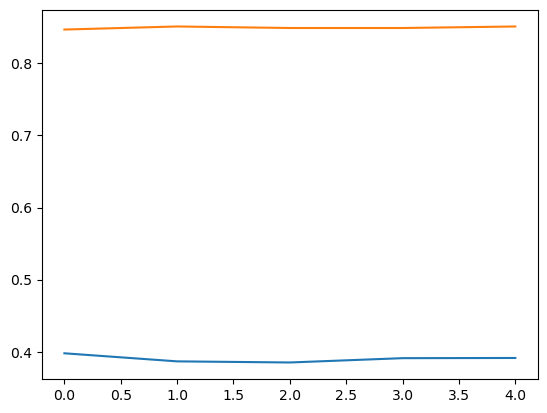

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

In [75]:
# Sequential 클래스를 이용한 신경망 구성
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential() # 순차 모델 생성
model.add(Input(shape=(4,), name="input_layer")) # 입력 레이어
model.add(Dense(50, activation="relu", name="Hidden_layer")) # 노드 50개인 밀접 레이어
model.add(Dense(3, activation="softmax", name="Output_layer")) # 노드 3개인 출력 레이어

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer (Dense)        (None, 50)                250       
                                                                 
 Output_layer (Dense)        (None, 3)                 153       
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [84]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape =( 4,)),
    Dense(50, activation="relu"),
    Dense(3, activation="softmax")
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                250       
                                                                 
 dense_11 (Dense)            (None, 3)                 153       
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Keras Funtional API
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import concatenate, Activation

input = Input(shape=(4,))
dense1 = Dense(50, activation="relu")(input)
dense2 = Dense(80, activation="relu")(input)
dense3 = Dense(30, activation="relu")(input)
x = concatenate([dense1, dense2, dense3])
output = Dense(3, activation="softmax")(x)

# 하나의 모델로 연결
model = Model(inputs = input, outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 50)           250         ['input_10[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 80)           400         ['input_10[0][0]']               
                                                                                                  
 dense_34 (Dense)               (None, 30)           150         ['input_10[0][0]']               
                                                                                              